# PRAKTIKUM Natural Language Processing

----------
## **Thema: Die Bibliothek ``spaCy`` (Grundlagen)**

Es gibt verschiedene Python-Libraries für NLP. In diesem Kurs werden wir unter anderem die Bibliothek ``spaCy`` verwenden. ``spaCy`` ist in der Verwendung sehr angenehm und unkompliziert, erfordert aber ein Verständnis des zugrundeliegenden Konzeptes. Ziel dieses Praktikums ist es, dass Sie dieses Grundverständnis erwerben und in anschließenden Übungsaufgaben die Bibliothek ``spaCy`` verwenden können.  

### Lernziele: 
* das Pipelining-Konzept von ``spaCy`` verstanden haben und erklären können
* trainierte Pipelines in ``spaCy`` laden und verwenden können
* die ``spaCy``-Objekte Doc, Token und Span kennen und Ihr Verhältnis zueinander erklären können
* Lexikalische Attribute sowie linguistische Annotationen und Eigennamen durch ``spaCy`` erzeugen / erkennen lassen und verwenden



### Lernkontrolle: 
Die formale Lernkontrolle erfolgt im nächsten Praktikum durch einen kurzen (papierbasierten) Test. In diesem werden Sie kurze Code-Snippets ergänzen müssen und einige Verständnisfragen beantworten müssen. <br>
Erlaubte Hilfsmittel beim Test: 1 handgeschriebenes A4-Blatt mit Notizen. 

Darüber hinaus werden Sie im nächsten Praktikums-Termin (bei dem auch eine Abgabe erfolgt) ``spaCy`` anwenden müssen.

-----------
## **Lernmaterial**


1. Foliensatz, der einen Überblick über ``spaCy`` gibt
1. ``spaCy``-Tutorial Kapitel 1, Abschnitte 1 - 9 <br>
https://course.spacy.io/de/chapter1
2. Übungsaufgaben, in denen das Gelernte angewandt und so gefestigt und geübt werden kann

### Übungsaufgaben 

#### **Exercise 1: Basics** 

Ex 1.1: Import spaCy and its English language class. Create the Language object (call it nlp).

In [1]:
import spacy

nlp = spacy.blank("en")

Ex 1.2.: Call the Language object  with an English sentence (should be at least 10 words long)

In [13]:
my_text = "I'm a german student of artificial intelligence. I can only recommend the course!"
doc = nlp(my_text)

Ex 1.3: Print the document text

In [3]:
doc.text

"I'm a german student of artificial intelligence. I can only recommend the course!"

Ex 1.4: Print only the stop words in the sentence

In [4]:
[token.text for token in doc if token.is_stop]

['I', "'m", 'a', 'of', 'I', 'can', 'only', 'the']

Ex 1.5: Get the 2nd token and print the values of all its lexical attributes

In [5]:
doc[1].text

"'m"

In [6]:
token = doc[1]
print(token.text)
print(token.lemma_)
print(token.pos_)
print(token.tag_)
print(token.dep_)

'm






Ex 1.6: Get the span which includes the 2nd, 3rd and 4th word in the document and print it

In [7]:
span = doc[1:4]
span.text

"'m a german"

#### **Exercise 2 - Finding percentages in a text**

Sum up the values of the percentages mentioned in the text below and calculate how much percent of "other" energy sources were used (= delta to 100).

In [8]:
text = "In the year 2015 42.2% of the power was produced with coal, 14.1% with nuclear power and 30% with renewable energies."

In [9]:
doc = nlp(text)

In [10]:
cache = 0

for token in doc:
    if token.i+1 < len(doc) and doc[token.i+1].text == "%":
        cache += float(token.text)
        
print(round(cache, 2), "%")

86.3 %


#### **Exercise 3 - Working with models**

Ex 3.1: Load the model "en_core_web_sm"

In [11]:
import spacy

nlp = spacy.load("en_core_web_sm")

Ex 3.2: Print the sentence of Exercise 1 with each word in its base form (lemma)

In [15]:
doc = nlp(my_text)

cache = ""
for token in doc:
    cache += f"{token.lemma_} "
    
print(cache[:-1])

I be a german student of artificial intelligence . I can only recommend the course !


Ex 3.3: Print the pos-tag in brackets behind each word of the sentence

In [16]:
cache = ""
for token in doc:
    cache += f"{token.text}[{token.pos_}] "
    
print(cache[:-1])

I[PRON] 'm[AUX] a[DET] german[ADJ] student[NOUN] of[ADP] artificial[ADJ] intelligence[NOUN] .[PUNCT] I[PRON] can[AUX] only[ADV] recommend[VERB] the[DET] course[NOUN] ![PUNCT]


#### **Exercise 4 - Counting parts-of-speech**

Process the following text using the German language model "de_core_news_sm". Count how often each POS tag occurs and plot a bar chart showing the numbers. You may use any visualization library that you like (e.g. matplotlib's method bar())

In [12]:
german_text = "Die Hochschule für Angewandte Wissenschaften Offenburg wurde 1964 als Staatliche Ingenieurschule gegründet und 1978 durch den betriebswirtschaftlichen Standort in Gengenbach ergänzt. In den 1990er-Jahren entwickelte sie als Fachhochschule neue Studienangebote im Bereich Medien sowie Master-Studiengänge mit internationaler Ausrichtung. In den vergangenen zehn Jahren hat sich die Zahl der Studierenden mehr als verdoppelt. Heute studieren an den beiden Standorten Offenburg und Gengenbach rund 4500 junge Menschen in den Bereichen Technik, Wirtschaft und Medien. Die vier Fakultäten bieten ein breites, interdisziplinäres und praxisorientiertes Fächerspektrum: Betriebswirtschaft und Wirtschaftsingenieurwesen, Elektrotechnik, Medizintechnik und Informationstechnik, Maschinenbau und Verfahrenstechnik sowie Medien und Informationswesen."

In [19]:
nlp = spacy.load("de_core_news_sm")
doc = nlp(german_text)

In [22]:
cache = dict()

for token in doc:
    if token.pos_ in cache.keys():
        cache[token.pos_] += 1
    else:
        cache[token.pos_] = 1
        
print(cache)

{'DET': 11, 'NOUN': 32, 'ADP': 12, 'PROPN': 4, 'AUX': 2, 'NUM': 5, 'ADJ': 9, 'VERB': 6, 'CCONJ': 10, 'PUNCT': 11, 'PRON': 2, 'ADV': 3}


<BarContainer object of 12 artists>

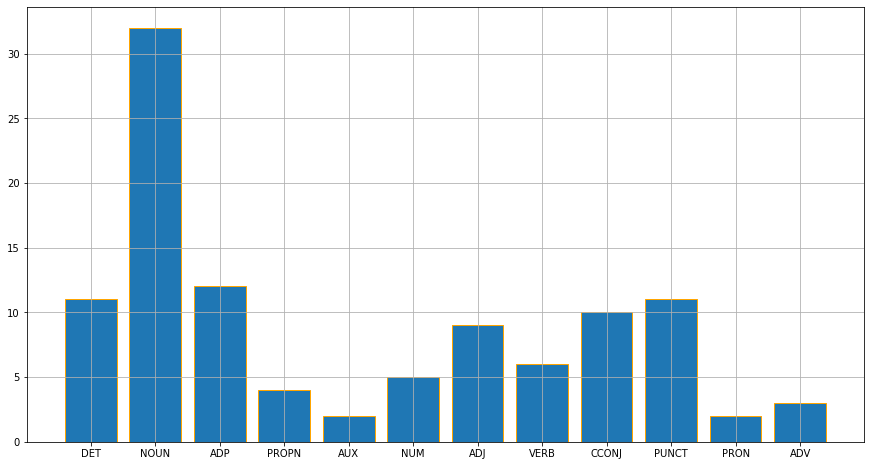

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.grid()

ax.bar(cache.keys(), cache.values(), edgecolor="orange")